<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/3_NW_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#To Do:

### 1. Compare firing rates between all three networks (for excitatory/inhibitory separately)

  How? 
  - Filter data using numpy for only ex/inh (based on neuron id)
  -  array of inh/ex divided by time (5000), and by the amount of neurons (1000 oder 4000) = firing rate (averaged)


### 2. Use different dimensionality reduction techniques and compare all three networks

#### Example 1: 

**PCA:** compare how many eigenvalues/dimensions are required to retain 90% of variance? 

#### Example 2: 

**Cluster analysis:** Compare similarity of different clusters based on different clustering algorithms (careful with IDs! Can differ! Must be evtl. normalized) 

  - How many clusters?
  - How what neuron belongs to what cluster? Compare their clustering (information from resulting array (neuron/cluster)) 

Hint: Balanced: 2, anderen 50/100


How much time I have: 2 - 3 months (starting from 13.04.21)

Main problem: how to handle data with scikit learn algorithms 

In [1]:
#get data from google drive
!gdown --id 1LvD4yrrrNhc98udFEl59Aa3Z7w_xoZ6S
#unzip data
!unzip 'Leyla_Data.zip'

Downloading...
From: https://drive.google.com/uc?id=1LvD4yrrrNhc98udFEl59Aa3Z7w_xoZ6S
To: /content/Leyla_Data.zip
2.12MB [00:00, 67.9MB/s]
Archive:  Leyla_Data.zip
  inflating: default.py              
  inflating: GIF.pkl                 
  inflating: IAF.pkl                 
  inflating: simulate_EI_network_Minimum.py  
  inflating: BN.pkl                  


In [2]:
#show all data files
!ls
# BN : Balanced Network
# IAF: clustered wo SFA (Spikre-frequency adaptation)
# GIF: clusterd with SFA

BN.pkl	    GIF.pkl  Leyla_Data.zip  simulate_EI_network_Minimum.py
default.py  IAF.pkl  sample_data


In [26]:
#what do the network parameters mean?
!cat simulate_EI_network_Minimum.py  
#remove # before !cat to print simulation code


import nest
import numpy as np
import time
import default
import pylab
import pickle

small = 1e-10

def max_PSP_exp(tau_m,tau_syn,C_m = 1.,E_l =0.):
    tmax = np.log(tau_syn/tau_m)/(1/tau_m-1/tau_syn)
    
    B = tau_m*tau_syn/C_m/(tau_syn-tau_m)
    return (E_l-B)*np.exp(-tmax/tau_m)+B*np.exp(-tmax/tau_syn)
    """calculates the maximum psp amplitude for exponential synapses and unit J"""


def calc_js(params):
    N_E = params.get('N_E', default.N_E)                          # excitatory units
    N_I = params.get('N_I', default.N_I)                          # inhibitory units
    N = N_E+N_I                                                  # total units
    ps = params.get('ps', default.ps) # connection probs
    ge = params.get('ge', default.ge)
    gi = params.get('gi', default.gi)
    gie = params.get('gie', default.gie)
    V_th_E = params.get('V_th_E', default.V_th_E)   # threshold voltage
    V_th_I = params.get('V_th_I', default.V_th_I)
    tau_E = params.get('tau_E', defa

In [ ]:
#firing rates vergleichen in allen netzwerktypen (einzeln inh/exh) --> numpy (daten nach ids filtern (ex/inh))
#array von inh/ex durch Zeit (5000), durch anzahl neurons (1000 oder 4000) = firing rate (averaged)


# dimensionality reduction techniques
#vergleich: PCA: eigenwerte --> wie viele Dimensionen ergeben 90% ? 
#cluster: balanced: 2, anderen 50/100

#ähnlichkeit der cluster zuordnung (vorsicht mit den IDs, kann anders sein)

#ca. 2 Monate

#scikit, wie gebe ich die Daten ein?

In [3]:
#import pickle
import pickle

In [24]:
#read pickle file
#x = actual data (time * neuron id --> firing rate)
#y = information on data (such as inhibitory/excitatory neurons, clusters, etc.)
with open('GIF.pkl', 'rb') as f:
    x = pickle.load(f)
    y = pickle.load(f)

In [25]:
#what is contained in y? 
y

{'I_th_E': 2.13,
 'I_th_I': 1.24,
 'N_E': 4000,
 'N_I': 1000,
 'Q': 50,
 'delta_I_xE': 0.0,
 'delta_I_xI': 0.0,
 'dt': 0.001,
 'jplus': array([[18.  , 13.75],
        [13.75, 13.75]]),
 'n_jobs': 4,
 'neuron_type': 'gif_psc_exp',
 'q_stc': [0.08333333333333333],
 'record_from': 1,
 'record_voltage': False,
 'simtime': 5000,
 'tau_stc': [180.0],
 'warmup': 250}

In [20]:
#show the data (x)
#first dimension: time
#second dimension: neuron id
#encoded: firing rate?

#show both dimensions, 5 data points (time, neuron id (firing rate?))
x[:, :5]

array([[5.600e-02, 4.800e-02, 1.810e-01, 1.390e-01, 2.340e-01],
       [2.711e+03, 2.827e+03, 4.243e+03, 4.991e+03, 2.695e+03]])

In [21]:
#5000 neurons (4000 ex., 1000 inh.)

#how many neurons do we have?
#show second dimension (neuron id)
#get maximum from all values (neuron ids)
import numpy as np
np.max(x[1, :])

4999.0

(0.0, 500.0)

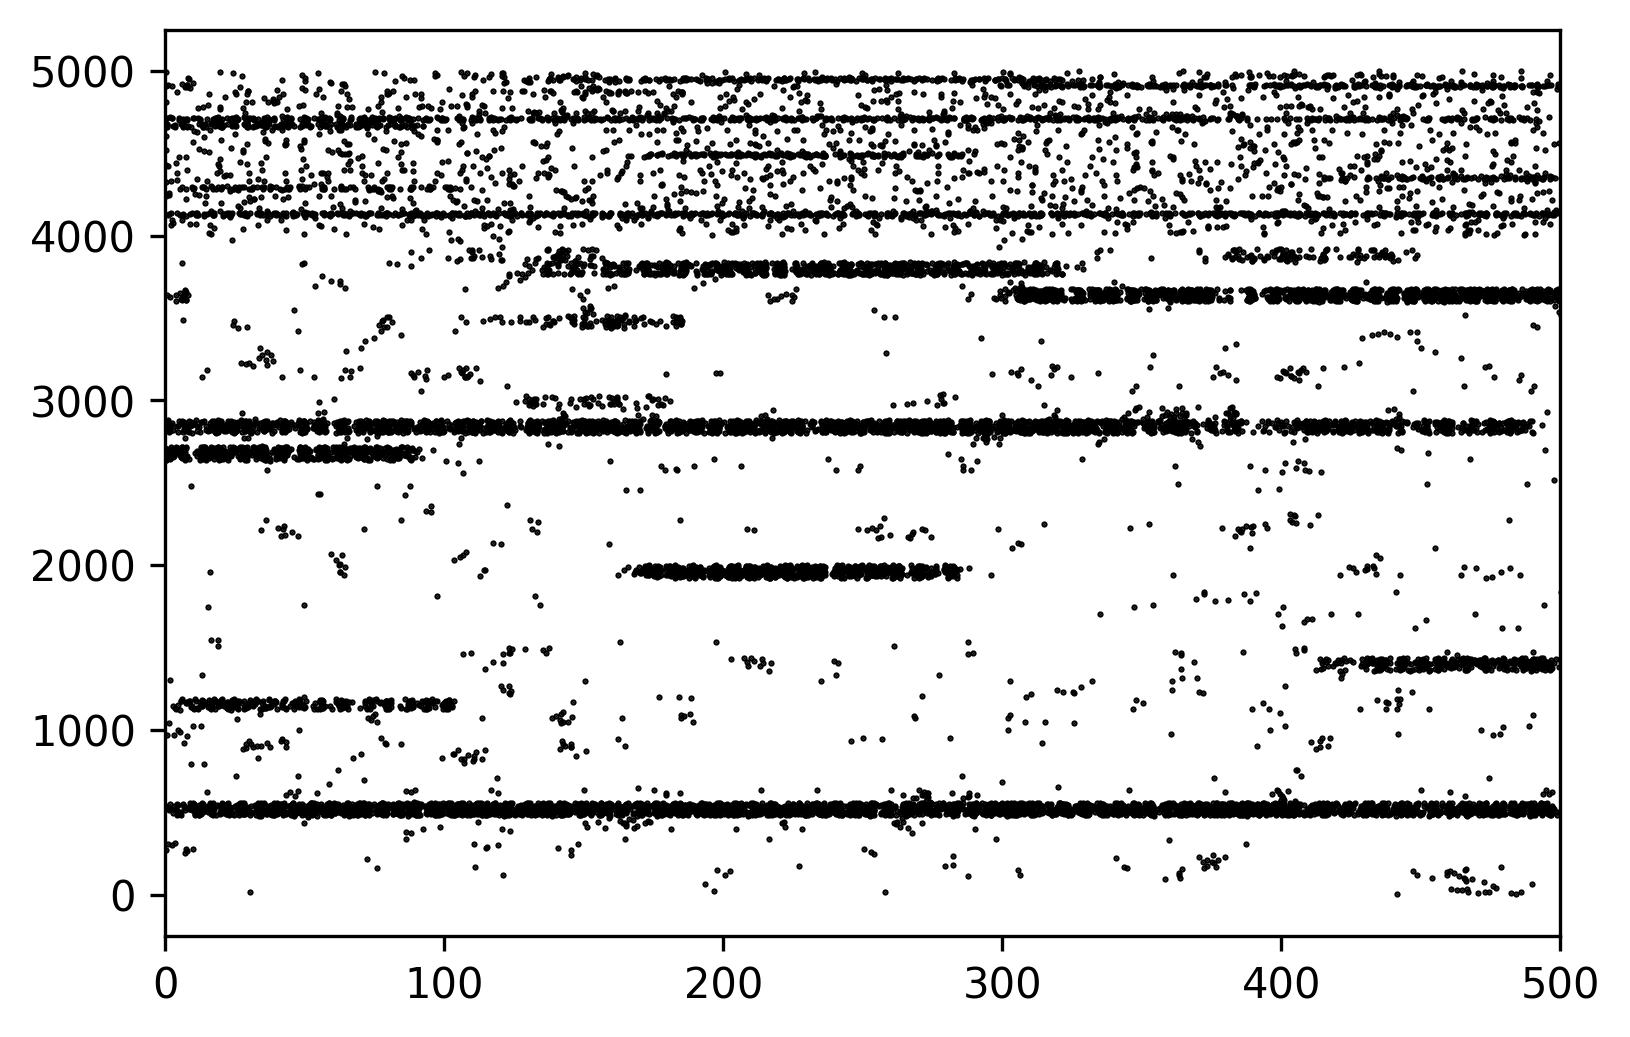

In [27]:
import matplotlib.pyplot as plt

#create figure
f1 = plt.figure(dpi=300)
#create subplot
plt.subplot(1,1,1)
#plot both dimensions of x (time, neuron id)
plt.plot(x[0],x[1],'.k',markersize = 1) 
#set limits (up to 0.5sec)
plt.xlim(0, 500)